In [12]:
!pip install qutip

In [13]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import math

In [14]:
#menentukan nilai Parameter
wc = 2*np.pi         #frekuensi medan
wa = 2*np.pi         #frekuensi atom
N = 40              #jumlah n medan
use_rwa = False
g_list  = np.linspace(0, 10, 401)*2*np.pi   #kuat interaksi
d_list  = [1000, 750, 500, 250, 100, 75, 50, 25, 10, 7.5, 5, 2.5, 1]          #kuat energi qubit

In [15]:
#operator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus
sz1 = tensor(qeye(N), sigmaz())  #operator sigma-z modifikasi
sx1 = tensor(qeye(N), sigmax())  #operator sigma-x modifikasi

In [16]:
# Hamiltonian
Ho = wc * a.dag() * a     # osilator
Hq = 0.5 * wa * sz1      #qubit
   
# Hamiltonian Interaksi
if use_rwa:
    H1 = (a.dag() * sm + a * sm.dag())
else:
    H1 = (a.dag() + a) * (sm + sm.dag())

### **S = 0.5,  $\Delta$ = (1000 sampai 1),  $\lambda$ = (0 sampai 10)**

In [17]:
# Menghitung Hamiltonian 
psi_list = []
E_list = []
S = []
for d in d_list:
  psi_list1 = []
  for g in g_list:
    # Hamiltonian total
    H = Ho + d*Hq + g * H1
       
    # menghitung state & energinya (terurut berdasar nilai lambda)
    eigen_energy, eigen_state = H.groundstate() 
    psi_list1.append(eigen_state)

  # menghitung partial trace densitas matriks
  rho_q = []
  for i in range(len(psi_list1)):
    psi_value = psi_list1[i]*psi_list1[i].dag()
    rho = psi_value.ptrace(1)
    rho_q.append(rho)

  # menghitung entropi
  S1 = []
  for i in range(len(rho_q)):
    s_list = entropy_vn(rho_q[i],2)
    S1.append(s_list)

  psi_list.append(psi_list1)
  S.append(S1)

# mencari nilai g dan d yang memenuhi syarat (s = 0.5)
g_values = []
d_values = []
for d in range(len(S)):
  for g in range(len(S[d])):
    if round(S[d][g], 2) == 0.50:
      g_values.append(g_list[g]/d_list[d])
      d_values.append(wa/d_list[d])

In [18]:
# mencari nilai g dan d yang memenuhi syarat (s = 0.5)
g_values2 = []
d_values2 = []
for d in range(len(S)):
  for g in range(len(S[d])):
    if round(S[d][g], 2) == 0.10:
      g_values2.append(g_list[g]/d_list[d])
      d_values2.append(wa/d_list[d])

Text(0.5, 0, '$\\frac{\\lambda}{\\hbar\\omega_{0}}$')

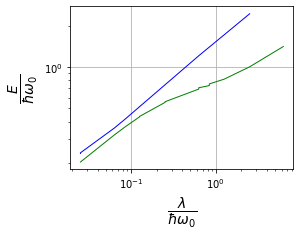

In [19]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(4,3))
 
axes.plot(d_values, g_values, 'blue', linewidth=1)
axes.plot(d_values2, g_values2, 'green', linewidth=1)

plt.yscale("log")
plt.xscale("log")
plt.grid(True)

axes.set_ylabel(r"$\frac{E}{\hbar\omega_{0}}$", fontsize=20)
axes.set_xlabel(r"$\frac{\lambda}{\hbar\omega_{0}}$", fontsize=20)

In [20]:
S

[[-0.0,
  1.997346570469551e-08,
  7.490298456217802e-08,
  1.6196495601251955e-07,
  2.7965574863776873e-07,
  4.269262829870809e-07,
  6.029683945988573e-07,
  8.071244067786578e-07,
  1.0388398911387443e-06,
  1.297635782356091e-06,
  1.5830905024704993e-06,
  1.8948278147613525e-06,
  2.2325081778612548e-06,
  2.59582237715222e-06,
  2.9844866968238784e-06,
  3.398239170360115e-06,
  3.836836606408392e-06,
  4.300052199044826e-06,
  4.787673569954838e-06,
  5.299501145177984e-06,
  5.835346803678689e-06,
  6.3950327223973886e-06,
  6.978390402968916e-06,
  7.5852598239003e-06,
  8.21548871274048e-06,
  8.868931906393015e-06,
  9.54545079618998e-06,
  1.0244912829923909e-05,
  1.0967191075952924e-05,
  1.1712163834053722e-05,
  1.2479714286151872e-05,
  1.3269730181851358e-05,
  1.4082103557168615e-05,
  1.491673047789775e-05,
  1.5773510806860724e-05,
  1.6652347994826114e-05,
  1.7553148885435067e-05,
  1.8475823537213137e-05,
  1.9420305562166065e-05,
  2.0386473352085397e-05,
  

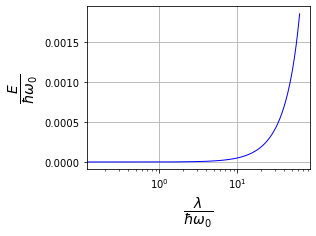

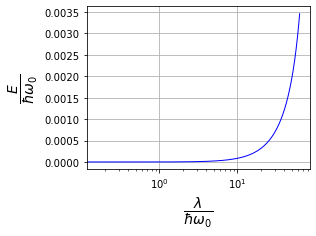

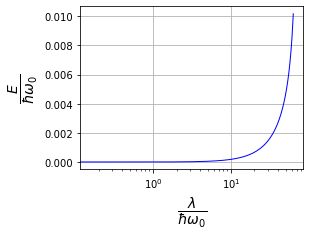

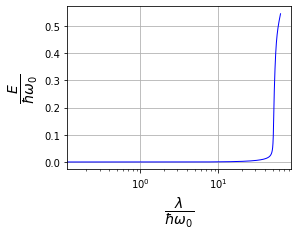

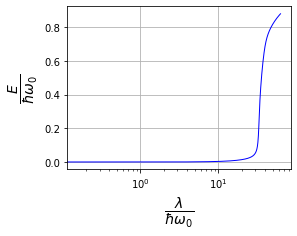

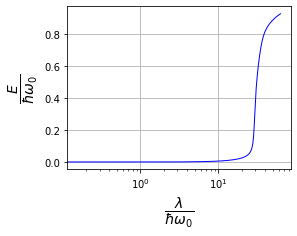

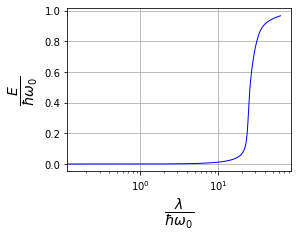

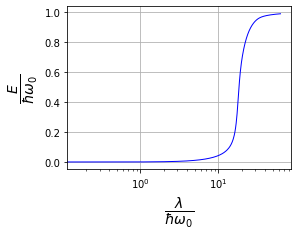

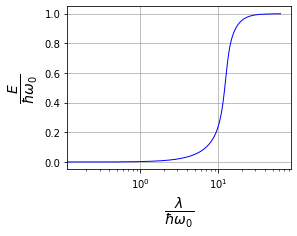

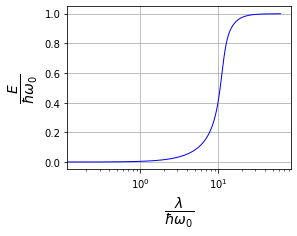

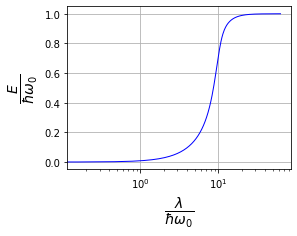

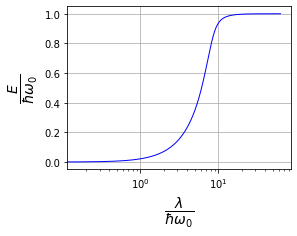

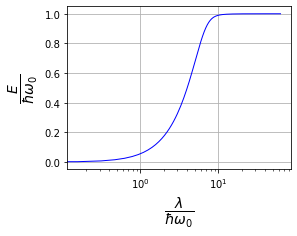

In [21]:
for d in range(len(d_list)):
  fig, axes = plt.subplots(1, 1, sharex=True, figsize=(4,3))
 
  axes.plot(g_list, S[d],  'blue', linewidth=1)
 
  plt.grid(True)
  plt.xscale('log')

  axes.set_ylabel(r"$\frac{E}{\hbar\omega_{0}}$", fontsize=20)
  axes.set_xlabel(r"$\frac{\lambda}{\hbar\omega_{0}}$", fontsize=20)

In [22]:
S

[[-0.0,
  1.997346570469551e-08,
  7.490298456217802e-08,
  1.6196495601251955e-07,
  2.7965574863776873e-07,
  4.269262829870809e-07,
  6.029683945988573e-07,
  8.071244067786578e-07,
  1.0388398911387443e-06,
  1.297635782356091e-06,
  1.5830905024704993e-06,
  1.8948278147613525e-06,
  2.2325081778612548e-06,
  2.59582237715222e-06,
  2.9844866968238784e-06,
  3.398239170360115e-06,
  3.836836606408392e-06,
  4.300052199044826e-06,
  4.787673569954838e-06,
  5.299501145177984e-06,
  5.835346803678689e-06,
  6.3950327223973886e-06,
  6.978390402968916e-06,
  7.5852598239003e-06,
  8.21548871274048e-06,
  8.868931906393015e-06,
  9.54545079618998e-06,
  1.0244912829923909e-05,
  1.0967191075952924e-05,
  1.1712163834053722e-05,
  1.2479714286151872e-05,
  1.3269730181851358e-05,
  1.4082103557168615e-05,
  1.491673047789775e-05,
  1.5773510806860724e-05,
  1.6652347994826114e-05,
  1.7553148885435067e-05,
  1.8475823537213137e-05,
  1.9420305562166065e-05,
  2.0386473352085397e-05,
  